In [8]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv("FIFA 2018 Statistics - FIFA 2018 Statistics.csv")

In [10]:
df=df.fillna(0)

In [11]:
df_new=df.iloc[:,4:19]
df_new

,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red
0,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0
1,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0
2,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0
3,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0
4,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0
124,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0
125,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0
126,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0


In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_new)
chi_square_value, p_value

(1242.0554521789472, 6.1329394266561e-194)

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_new)
kmo_model

0.5539603554297706

In [14]:
fa = FactorAnalyzer()
fa.fit(df_new)
ev, v = fa.get_eigenvalues()
ev
count=0
for i in range(0,len(ev)):
    if(ev[i]>1):
        count+=1
count

5

In [17]:
ev


array([4.91716407, 1.6468651 , 1.31783903, 1.28786505, 1.04318126,
       0.98685718, 0.82164804, 0.67375811, 0.64099217, 0.55097254,
       0.44612018, 0.35897919, 0.23335382, 0.06881835, 0.00558592])

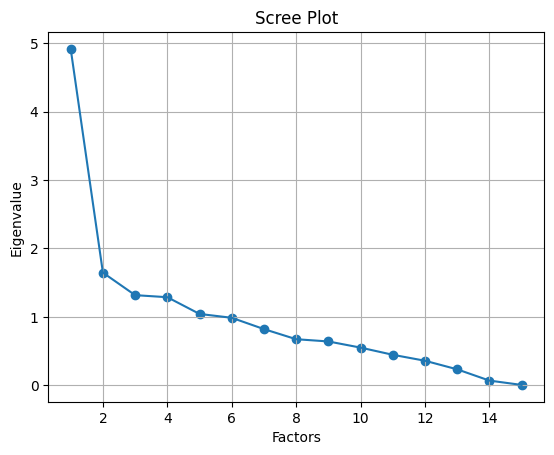

In [83]:
plt.scatter(range(1,df_new.shape[1]+1),ev)
plt.plot(range(1,df_new.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [84]:
fa = FactorAnalyzer(n_factors=count,rotation='varimax')
fa.fit(df_new)
factor_df=pd.DataFrame(fa.loadings_,index=df_new.columns)
print(factor_df)

                               0         1         2         3         4
Ball Possession %       0.337633  0.868701 -0.179499 -0.071129  0.106721
Attempts                0.994312  0.234177 -0.129799  0.092461 -0.078996
On-Target               0.618740  0.134676 -0.083508 -0.073968 -0.061816
Off-Target              0.539515  0.193810 -0.128558  0.247246 -0.230906
Blocked                 0.626085  0.321058 -0.096638  0.037888  0.130323
Corners                 0.649120  0.322093 -0.084447  0.062287  0.039136
Offsides               -0.012194  0.046593 -0.033084 -0.017946  0.302670
Free Kicks              0.097977  0.254636  0.114750  0.027401 -0.000023
Saves                  -0.245411 -0.266061 -0.046783  0.219567  0.195987
Pass Accuracy %         0.238100  0.655345 -0.212670 -0.258983  0.157588
Passes                  0.340098  0.851294 -0.276654  0.196252  0.049630
Distance Covered (Kms)  0.122887 -0.013437  0.068409  0.743486 -0.024120
Fouls Committed        -0.113473 -0.095350  0.97470

In [85]:
fa.get_factor_variance()

(array([2.88095023, 2.3771034 , 1.36285915, 0.81613103, 0.71423938]),
 array([0.19206335, 0.15847356, 0.09085728, 0.05440874, 0.04761596]),
 array([0.19206335, 0.35053691, 0.44139419, 0.49580292, 0.54341888]))